# Gaussian Naive Bayes

In [25]:
#Importing important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, log_loss
import math
from sklearn.preprocessing import LabelEncoder
!pip install scikit-plot
import scikitplot as skplt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import time

You should consider upgrading via the 'C:\Users\wazid\anaconda3\python.exe -m pip install --upgrade pip' command.


In [26]:
df = pd.read_csv('Project.csv')
df.head()

,c/c++,java,python,wt,dbms,se,ds,algo,math,stats,project
0,4,4,4,3,4,4,4,4,4,4,AI
1,4,3,4,3,5,5,4,3,3,4,AI
2,3,3,3,3,3,5,5,5,2,4,WA
3,4,3,5,3,4,5,3,3,4,4,Cloud
4,5,2,5,3,4,5,5,5,3,3,Others


In [27]:
X = df.drop(columns=(['project']))
y = df['project']  
le = LabelEncoder()
y = le.fit_transform(y)
temp = 0
for i in range(1,1000):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=i)
    gnb = GaussianNB()
    gnb.fit(X_train,y_train)
    acc = round(accuracy_score(gnb.predict(X_test),y_test),2)
    if acc>temp:
        temp = acc
        ac = temp
        print("Accuracy :",temp," at random_state : ",i)

Accuracy : 0.31  at random_state :  1
Accuracy : 0.35  at random_state :  2
Accuracy : 0.38  at random_state :  5
Accuracy : 0.4  at random_state :  13
Accuracy : 0.44  at random_state :  24
Accuracy : 0.45  at random_state :  262
Accuracy : 0.48  at random_state :  289
Accuracy : 0.51  at random_state :  654


In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=654)
gnb = GaussianNB()
gnb.fit(X_train,y_train)
print("Obtained accuracy of KNN Algorithm : ",accuracy_score(gnb.predict(X_test),y_test)*100,"%")
y_pred = gnb.predict(X_test)
print("R2 Value                           :",round(r2_score(y_test,y_pred),2))
print("Log loss                           : ",round(log_loss(y_test, gnb.predict_proba(X_test)),2))
print("Mean Squared Error                 : ",round(mean_squared_error(y_test,y_pred),2))

Obtained accuracy of KNN Algorithm :  51.24999999999999 %
R2 Value                           : -0.31
Log loss                           :  1.65
Mean Squared Error                 :  8.44


In [29]:
# Confusion Matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[ 9,  0,  2,  0,  0,  1,  8],
       [ 1,  1,  1,  0,  0,  0,  3],
       [ 0,  0,  0,  0,  0,  1,  2],
       [ 1,  1,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  2,  1,  4],
       [ 2,  1,  0,  0,  0,  1,  1],
       [ 2,  0,  1,  0,  0,  3, 28]], dtype=int64)

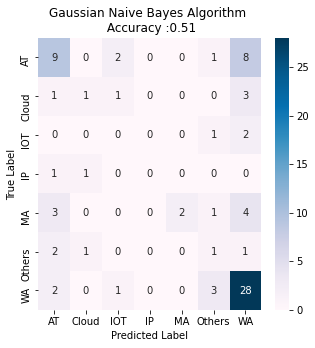

In [30]:
#Heatmap

cm = confusion_matrix(y_test,y_pred)
cm_df = pd.DataFrame(cm, index = ['AT','Cloud','IOT','IP','MA','Others','WA'],
                         columns = ['AT','Cloud','IOT','IP','MA','Others','WA'])
plt.figure(figsize=(5,5))
sns.heatmap(cm_df,annot=True, cmap='PuBu')
plt.title('Gaussian Naive Bayes Algorithm \n Accuracy :{0:.2f}'.format(accuracy_score(y_test,y_pred)))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [31]:
# Classification Report
print("Classification Report \n",classification_report(y_test, y_pred,target_names = ['AT','Cloud','IOT','IP','MA','Others','WA']))

Classification Report 
               precision    recall  f1-score   support

          AT       0.50      0.45      0.47        20
       Cloud       0.33      0.17      0.22         6
         IOT       0.00      0.00      0.00         3
          IP       0.00      0.00      0.00         2
          MA       1.00      0.20      0.33        10
      Others       0.14      0.20      0.17         5
          WA       0.61      0.82      0.70        34

    accuracy                           0.51        80
   macro avg       0.37      0.26      0.27        80
weighted avg       0.54      0.51      0.48        80



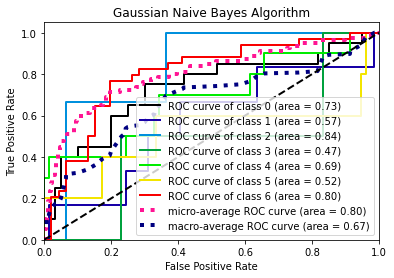

In [32]:
#ROC Curve

skplt.metrics.plot_roc_curve(y_test, gnb.predict_proba(X_test))
plt.title("Gaussian Naive Bayes Algorithm")
plt.show()

In [33]:
#Prediction

input1 = [3,4,5,2,4,5,3,4,5,3]
input2 = [5,5,5,1,4,5,3,5,5,3]
input3 = [4,4,2,1,4,2,2,1,1,1]
input4 = [4,4,2,1,4,2,2,1,1,1]
input5 = [1,4,2,1,1,2,2,1,1,1]
input6 = [5,5,5,3,2,2,2,5,2,5]
input7 = [5,5,2,1,2,2,2,1,1,1]
inputs = [input1,input2,input3,input4,input5,input6,input7]
for input in inputs:
    print("Input  : ",input)
    input = np.reshape(input,(1,10))
    cls = gnb.predict(input)
    if cls == 0:
        print("Output :  AI")
    elif cls == 1:
        print("Output :  Cloud")
    elif cls == 2:
        print("Output :  IOT")
    elif cls == 3:
        print("Output :  IP")
    elif cls == 4:
        print("Output :  MA")
    elif cls==5:
        print("Output :  Others")
    else:
        print("Output :  WA")

Input  :  [3, 4, 5, 2, 4, 5, 3, 4, 5, 3]
Output :  AI
Input  :  [5, 5, 5, 1, 4, 5, 3, 5, 5, 3]
Output :  Cloud
Input  :  [4, 4, 2, 1, 4, 2, 2, 1, 1, 1]
Output :  Others
Input  :  [4, 4, 2, 1, 4, 2, 2, 1, 1, 1]
Output :  Others
Input  :  [1, 4, 2, 1, 1, 2, 2, 1, 1, 1]
Output :  Others
Input  :  [5, 5, 5, 3, 2, 2, 2, 5, 2, 5]
Output :  MA
Input  :  [5, 5, 2, 1, 2, 2, 2, 1, 1, 1]
Output :  Others


In [34]:
def predict(a):
    print("Ratings : ",a)
    a = np.reshape(a,(1,10))
    cls = gnb.predict(a)  
    if cls == 0:
        return "AI"
    elif cls == 1:
        return "Cloud"
    elif cls == 2:
        return "IOT"
    elif cls == 3:
        return "IP"
    elif cls == 4:
        return "MA"
    elif cls==5:
        return "Others"
    else:
        return "WA"

In [35]:
input = [5,4,3,2,4,3,2,5,4,3]
predict(input)

Ratings :  [5, 4, 3, 2, 4, 3, 2, 5, 4, 3]


'AI'